In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Telco_Churn_Raw.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes 
#TotalCharges is of object whereas it should be numeric
#Senior citizen can also be converted to Yes or No category

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum() #No null values in the dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Changing TotalCharges data type from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
df['TotalCharges'].dtype

dtype('float64')

In [10]:
# There was no as such need of doing this as we dont have any null or empty value in the TotalCharges column but if there has been then it would have been filled with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
# Customer id will not be useful in modelling as it will not show any pattern or behaviour or category being a unique value so we can drop it
df.drop(columns = 'customerID', inplace=True)

In [12]:
# Confirm the changes that we did above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# Now lets move to the Exploratory Data Analysis(EDA)

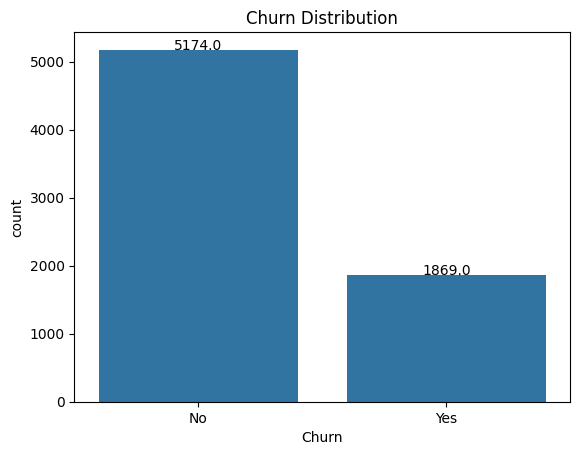

In [14]:
# Churn Distribution - We will look at the values that how much customers are churned and how much are not
ax = sns.countplot(x='Churn', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(),                   # It is giving the value of the count for the each bar in the plot
               (p.get_x() + 0.4, p.get_height()),  # Here we are deciding the position of that label that where it should be displayed 
               ha = 'center')                     # It is telling to align the label horizontally over the bars
plt.title('Churn Distribution')
plt.show()

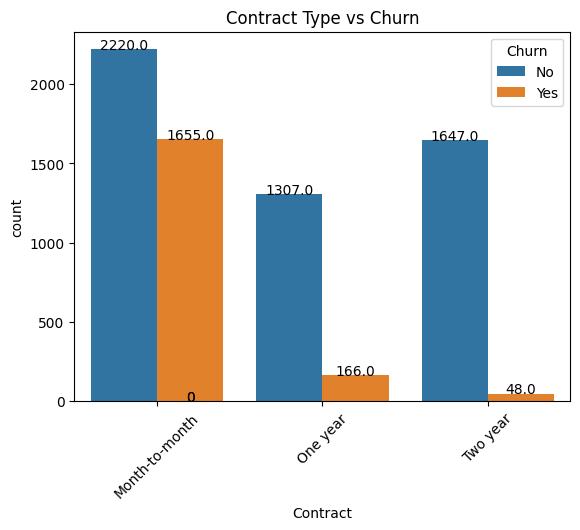

In [15]:
# Contract Type vs Churn
ax = sns.countplot(x='Contract', hue='Churn', data=df)
for p in ax.patches:
    ax.annotate(p.get_height(),
               (p.get_x() + 0.2, p.get_height()),
                ha = 'center')
plt.title('Contract Type vs Churn')
plt.xticks(rotation = 45)
plt.show()

# We can conclude that customers with month to month contract type have the most churns or we can say users with long term contract have less churn tendency 

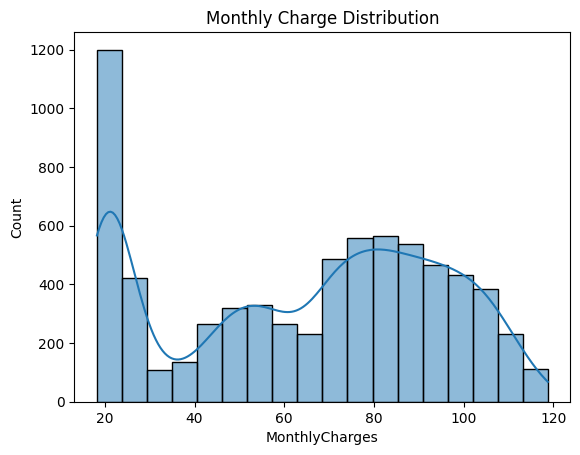

In [16]:
# Monthly Charge Distribution
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Monthly Charge Distribution')
plt.show()

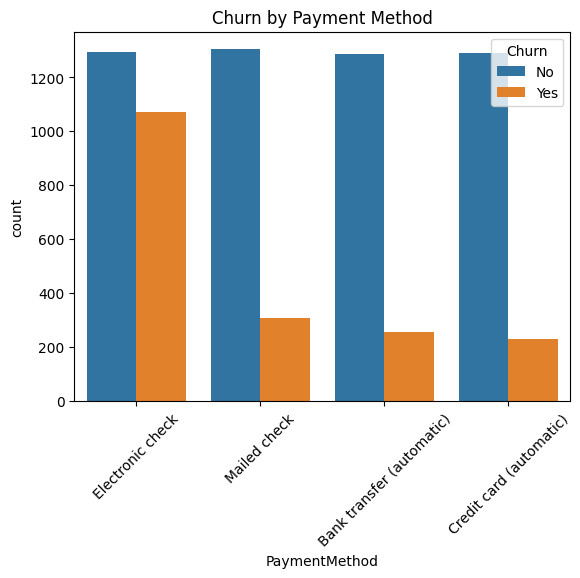

In [17]:
# Churn by Payment Mode
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation = 45)
plt.show()

# Users with electronic check payment method are having more churns compared to othres

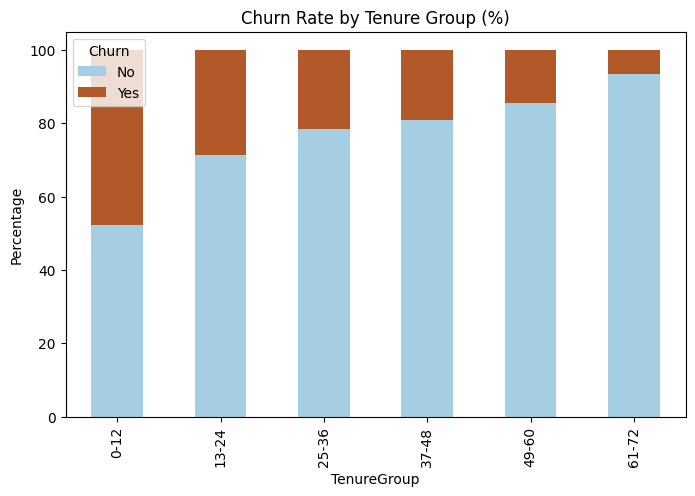

In [18]:
# Tenure Group vs Churn
bins = [0,12,24,36,48,60,72] 
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'] # In these two lines we created tenure groups in months
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True) # right=True ensures that 12 in 0-12 is included
tenure_churn = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100
tenure_churn.plot(kind='bar', stacked=True, colormap='Paired', figsize=(8,5))
plt.title("Churn Rate by Tenure Group (%)")
plt.ylabel("Percentage")
plt.show()

# As expected it shows that users with longer tenure have lesser churn rate than newer customers 

In [19]:
# Total revenue column
df['TotalRevenue'] = df['tenure'] * df['MonthlyCharges']

In [22]:
# Contract vs Churn 
df.groupby('Contract')['Churn'].value_counts(normalize=True)
# Here we can easily see that longer contracts are having lower churn rates

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

In [23]:
# Payment Method vs Churn
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
# Electronic check payment method has highest churn rate so we can put some offer on automatic pay methods for more customer retention

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64

In [24]:
df.to_csv('../data/Telco_Churn_Cleaned.csv', index=False)

In [26]:
# Now we will move to MySQl workbench to run some querries to extract required data, lets check all the columns and data types to make the same table in the workbench
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
TenureGroup         category
TotalRevenue         float64
dtype: object

In [27]:
# Since we might need to see the customerID too for some purpose so we need to have a different file including that column too so lets make a seperate csv for MySQL workbench
DF = pd.read_csv('../data/Telco_Churn_Raw.csv')

In [29]:
# The things to change are changing TotalCharges data type, adding columns TenureGroup, TotalRevenue
DF['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 

In [31]:
# Creating TenureGroup Column
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
DF['TenureGroups'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

In [32]:
# Creating TotalRevenue Column
DF['TotalRevenue'] = DF['MonthlyCharges'] * DF['tenure']

In [33]:
DF.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
TenureGroups        category
TotalRevenue         float64
dtype: object

In [35]:
# Now we are done with our new file for SQL querries
DF.to_csv('../data/Telco_Churn_Cleaned_SQL.csv', index=False)